# 1) CIFAR-100 dataset and visualize it

Step 1: Import necessary libraries for loading the dataset and visualization.

Step 2: Load the CIFAR-100 dataset using a library like TensorFlow.

Step 3: Select a few images and their corresponding labels from the dataset.

Step 4: Use a plotting library like Matplotlib to display the selected images with their labels.

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


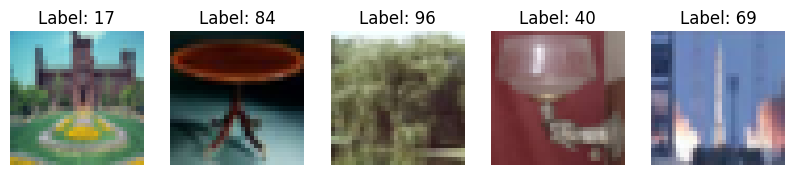

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Select a few images and labels
num_images_to_show = 5
random_indices = np.random.choice(len(x_train), num_images_to_show, replace=False)

plt.figure(figsize=(10, 2))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_train[idx])
    plt.title(f"Label: {y_train[idx][0]}") # CIFAR-100 labels are nested arrays
    plt.axis('off')
plt.show()

# 2) A basic CNN trained on the CIFAR-100 dataset

Step 1: Define a simple CNN model architecture using a framework like TensorFlow/Keras. This would typically include convolutional layers, pooling layers, and dense layers.

Step 2: Compile the model, specifying an optimizer, loss function, and metrics.

Step 3: Train the model on the training data for a few epochs.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the basic CNN model
model_base = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(100, activation='softmax') # 100 classes for CIFAR-100
])

# Compile the model
model_base.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model (for a short period for demonstration)
history_base = model_base.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.0084 - loss: 5.1933 - val_accuracy: 0.0100 - val_loss: 4.6052


# 3) Show options of tuning learning rate and compare output with the base model

Step 1: Define a function to create and compile a model with a given learning rate.

Step 2: Train models with different learning rates.

Step 3: Compare the training and validation performance (e.g., accuracy, loss) of models trained with different learning rates against the base model's performance.

In [ ]:
from tensorflow.keras.optimizers import Adam

def create_model_with_lr(learning_rate):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(100, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

# Train models with different learning rates
learning_rates = [0.01, 0.001, 0.0001]
histories_lr = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model_lr = create_model_with_lr(lr)
    histories_lr[lr] = model_lr.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), verbose=0)

# Compare performance (you would typically plot the history)
print("\nComparison of models with different learning rates:")
for lr, history in histories_lr.items():
    print(f"LR: {lr} - Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Base Model - Val Accuracy: {history_base.history['val_accuracy'][-1]:.4f}")

Training with learning rate: 0.01
Training with learning rate: 0.001
Training with learning rate: 0.0001

Comparison of models with different learning rates:
LR: 0.01 - Val Accuracy: 0.0100
LR: 0.001 - Val Accuracy: 0.0525
LR: 0.0001 - Val Accuracy: 0.0103
Base Model - Val Accuracy: 0.0100


# 4) Show options of tuning batch size and compare output with the base model

Step 1: Define a function to create and compile the model (batch size is a fit parameter).

Step 2: Train the model with different batch sizes.

Step 3: Compare the training and validation performance of models trained with different batch sizes.

In [ ]:
def create_basic_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(100, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

# Train models with different batch sizes
batch_sizes = [8, 16, 32, 64]
histories_bs = {}

for bs in batch_sizes:
    print(f"Training with batch size: {bs}")
    model_bs = create_basic_model()
    histories_bs[bs] = model_bs.fit(x_train, y_train, epochs=1, batch_size=bs, validation_data=(x_test, y_test), verbose=0)

# Compare performance
print("\nComparison of models with different batch sizes:")
for bs, history in histories_bs.items():
    print(f"Batch Size: {bs} - Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Base Model - Val Accuracy: {history_base.history['val_accuracy'][-1]:.4f}")

Training with batch size: 8
Training with batch size: 16
Training with batch size: 32
Training with batch size: 64

Comparison of models with different batch sizes:
Batch Size: 8 - Val Accuracy: 0.0542
Batch Size: 16 - Val Accuracy: 0.0100
Batch Size: 32 - Val Accuracy: 0.0781
Batch Size: 64 - Val Accuracy: 0.0895
Base Model - Val Accuracy: 0.0100


# 5) Show options of tuning regularization and compare output with the base model

Step 1: Define a function to create and compile a model with different regularization techniques (e.g., L2 regularization on kernel weights).

Step 2: Train models with different regularization strengths or types.

Step 3: Compare the training and validation performance of models trained with and without regularization.

In [ ]:
from tensorflow.keras.regularizers import l2

def create_model_with_regularization(reg_strength=0.0):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(reg_strength)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(reg_strength)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(reg_strength)),
        Flatten(),
        Dense(64, activation='relu', kernel_regularizer=l2(reg_strength)),
        Dense(100, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

# Train models with different regularization strengths
reg_strengths = [0.0, 0.001, 0.01] # 0.0 is no regularization
histories_reg = {}

for reg_strength in reg_strengths:
    print(f"Training with regularization strength: {reg_strength}")
    model_reg = create_model_with_regularization(reg_strength)
    histories_reg[reg_strength] = model_reg.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), verbose=0)

# Compare performance
print("\nComparison of models with different regularization strengths:")
for reg_strength, history in histories_reg.items():
    print(f"Reg Strength: {reg_strength} - Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Base Model - Val Accuracy: {history_base.history['val_accuracy'][-1]:.4f}")

Training with regularization strength: 0.0
Training with regularization strength: 0.001
Training with regularization strength: 0.01

Comparison of models with different regularization strengths:
Reg Strength: 0.0 - Val Accuracy: 0.0100
Reg Strength: 0.001 - Val Accuracy: 0.0100
Reg Strength: 0.01 - Val Accuracy: 0.1328
Base Model - Val Accuracy: 0.0100


# 6) Show grid search

Step 1: Define the hyperparameters and their possible values to search over.

Step 2: Use a library like Scikit-learn's GridSearchCV or build a custom grid search loop.

Step 3: For each combination of hyperparameters, train a model and evaluate its performance.

Step 4: Identify the best combination of hyperparameters based on a chosen metric (e.g., validation accuracy).

In [ ]:
from sklearn.model_selection import ParameterGrid

# Define the hyperparameter grid
param_grid = {'learning_rate': [0.001, 0.0001], 'batch_size': [64, 128]}

best_accuracy = 0
best_params = None

# Perform grid search
for params in ParameterGrid(param_grid):
    print(f"\nTraining with params: {params}")

    model_gs = create_model_with_lr(params['learning_rate']) # Using the function from LR tuning
    history_gs = model_gs.fit(x_train, y_train, epochs=1, batch_size=params['batch_size'], validation_data=(x_test, y_test), verbose=0)

    val_accuracy = history_gs.history['val_accuracy'][-1]

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = params

print(f"\nBest hyperparameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy:.4f}")


Training with params: {'batch_size': 64, 'learning_rate': 0.001}

Training with params: {'batch_size': 64, 'learning_rate': 0.0001}

Training with params: {'batch_size': 128, 'learning_rate': 0.001}

Training with params: {'batch_size': 128, 'learning_rate': 0.0001}

Best hyperparameters: {'batch_size': 128, 'learning_rate': 0.0001}
Best validation accuracy: 0.0163
